# Scaling Empiric data for table 2

In [21]:
import sys
import os
import os.path
import io
import csv
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import gamma
from scipy import integrate
import seaborn as sns
import numpy.random as nprand
import matplotlib.ticker as mticker
# plt.rcParams.update({'font.size': 16})
from scipy.stats import gamma

In [22]:
init_path="../../../"

In [23]:
def readfiles1(pathtofile, file_name, ext_name,withoutneutral,withoutnan,minq,minfert,logfert,line_to_begin):
    data_file = pathtofile+file_name+"."+ext_name
    data = dict()
    params = []
    nbline=1
    with io.open(data_file,'r') as f:
        reader = csv.reader(f)
        firstline = True
        for line in reader:
            lin = line[0].split()
            if not firstline:
                if nbline>=line_to_begin:
                    for j in range(len(lin)):
                        if ext_name == "allele":
                            if float(lin[5])>minq and float(lin[6])>minfert:
                                if withoutneutral==1 and float(lin[1]) != -3 :
                                    if withoutnan == 0:
                                        if logfert==True and (j==6 or j==9):
                                            data[params[j]].append(np.log(float(lin[j])))
                                        else:
                                            data[params[j]].append(float(lin[j]))
                                    elif withoutnan ==1 :
                                        if lin[5]!="-nan" and lin[6]!="-nan":
                                            if logfert==True and (j==6 or j==9):
                                                data[params[j]].append(np.log(float(lin[j])))
                                            else:
                                                data[params[j]].append(float(lin[j])) 
                                elif withoutneutral==0:
                                    if withoutnan == 0:
                                        if logfert==True and (j==6 or j==9):
                                            data[params[j]].append(np.log(float(lin[j])))
                                        else:
                                            data[params[j]].append(float(lin[j]))
                                    elif withoutnan ==1 :
                                        if lin[5]!="-nan" and lin[6]!="-nan":
                                            if logfert==True and (j==6 or j==9):
                                                data[params[j]].append(np.log(float(lin[j])))
                                            else:
                                                data[params[j]].append(float(lin[j]))
                        elif ext_name == "trace" and logfert==True and (j==6 or j==14):
                            data[params[j]].append(np.log(float(lin[j])))
                        else :
                            data[params[j]].append(float(lin[j]))
                nbline=nbline+1
            else:
                for j in lin:
                    data[j]=[]
                    params.append(j)
                firstline = False
                nbline=nbline+1
    return (data)

In [24]:
def readparamsfile(pathtofile, file_name, ext_name):
    data_file = pathtofile+file_name+"."+ext_name
    data = dict()
    params = []
    with io.open(data_file,'r') as f:
        reader = csv.reader(f)
        for line in reader:
            lin = line[0].split()
            data[lin[0]]=[]
            data[lin[0]].append(float(lin[1]))
    return (data)

In [25]:
def dico_data(target_folder_path,x_params,y_params, file_ext, withneutral,withoutnan,withlog,initline):
    list_files = sorted(os.listdir(target_folder_path))
    dico_file = dict()
    list_namefile=[]
    for file_name in list_files :
        if file_name.split(".")[1]==file_ext :
            if withneutral==1:
                data_file=readfiles(target_folder_path, file_name.split(".")[0], file_name.split(".")[1],0,withoutnan)
            elif withneutral==0:
                data_file=readfiles1(target_folder_path, file_name.split(".")[0], file_name.split(".")[1],1,withoutnan,0,0,withlog,initline)
            if  x_params in data_file and y_params in data_file :
                dico_file[(file_name.split(".")[0]).split("_")[-1]+"_x_params"]=data_file[x_params]
                dico_file[(file_name.split(".")[0]).split("_")[-1]+"_y_params"]=data_file[y_params]
            list_namefile.append((file_name.split(".")[0]).split("_")[2])
    list_namefile=sorted(list(set(list_namefile)))
    #print(len(data_file[y_params]))
    #print(len(data_file[x_params]))
    #print(data_file1[y_params])
    return (list_namefile,dico_file)

In [26]:
N=5000
h=800
d=8
coeff_gamma=0.3
init_line=100

In [27]:
def simpson(f, a, b, n,coeff_gamma,c):
    pas = (b - a) / n
    somme = (f(a,coeff_gamma,c) + f(b,coeff_gamma,c)) / 2 + 2 * f(a + pas / 2,coeff_gamma,c)  # On initialise la somme
    x = a + pas           # La somme commence à x_1 
    for i in range(1, n): # On calcule la somme 
        somme += f(x,coeff_gamma,c) + 2 * f(x + pas / 2,coeff_gamma,c)
        x += pas
    return somme * pas / 3   # On retourne cette somme fois le pas / 3  

#c=1
#c=2
coeff_gamma=0.6
c=1
def gamma_func(aff,coeff_gamma):
    integral=1/coeff_gamma*np.exp(-aff*1/coeff_gamma)
    return integral

def x_0_func(aff,coeff_gamma,c):
    integral=(c*aff)/(1+c*aff)*gamma_func(aff,coeff_gamma)
    return integral
def x2_0_func(aff,coeff_gamma,c):
    integral=((c*aff)/(1+c*aff))**2*gamma_func(aff,coeff_gamma)
    return integral
def x3_0_func(aff,coeff_gamma,c):
    integral=((c*aff)/(1+c*aff))**3*gamma_func(aff,coeff_gamma)
    return integral
def x4_0_func(aff,coeff_gamma,c):
    integral=((c*aff)/(1+c*aff))**4*gamma_func(aff,coeff_gamma)
    return integral


#def x_bar_func(aff):
#    integral=(c*aff)/(1+c*aff)*gamma_func(aff,coeff_gamma)*np.exp(-((c*aff)/(1+c*aff))/(x_0)*z_bar)
#    return integral
#def x2_bar_func(aff):
#    integral=((c*aff)/(1+c*aff))**2*gamma_func(aff,coeff_gamma)*np.exp(-((c*aff)/(1+c*aff))/(x_0)*z_bar)
#    return integral
#def x3_bar_func(aff):
#    integral=((c*aff)/(1+c*aff))**3*gamma_func(aff,coeff_gamma)*np.exp(-((c*aff)/(1+c*aff))/(x_0)*z_bar)
#    return integral

In [28]:
x_0=simpson(x_0_func, 0, 100, 1000,coeff_gamma,c)
x2_0=simpson(x2_0_func, 0, 100, 1000,coeff_gamma,c)
x3_0=simpson(x3_0_func, 0, 100, 1000,coeff_gamma,c)
x4_0=simpson(x4_0_func, 0, 100, 1000,coeff_gamma,c)
q_0=(2*x2_0-x3_0)/(x_0)
w_0=1-np.exp(-d*q_0)###############################
beta_0=(-2*x3_0+x4_0+(2*x2_0**2)/(x_0)-(x3_0*x2_0)/(x_0))/(2*x_0**2)
alpha=abs((1/w_0)*d*beta_0*np.exp(-d*q_0))############################
#rho=(N*v*d)/(2*h)
#mu=4*N*u
#z_bar=np.sqrt(rho/(mu*alpha))

In [29]:
def s0_def(list_namefile_age,dico_file_age,list_namefile_freq,dico_file_freq):
    #print(list_namefile_age)
    S0=[]
    for i in list_namefile_age :
        fert_moy=0
        n=len(dico_file_age[i+"_x_params"])
        m=min(dico_file_age[i+"_x_params"])
        ntot=0
        for j in range(n):
            if dico_file_age[i+"_x_params"][j]==m and dico_file_age[i+"_y_params"][j]!=0:
                fert_moy+=dico_file_age[i+"_y_params"][j]
                ntot+=1
        fertility_new_all=fert_moy/ntot
        #print(fertility_new_all)# = fert_0?
        #print(np.mean(dico_file_age[i+"_y_params"]))# = w_bar ?
        meanfert=0
        for j in range(len(dico_file_age[i+"_y_params"])):
            meanfert=meanfert+dico_file_freq[i+"_y_params"][j]*dico_file_freq[i+"_x_params"][j]
        #print(meanfert/(31-14))
        #print(sum(dico_file1[i+"_x_params"])/(84-35))
        fert_moy=np.log(fert_moy/ntot)-np.log(np.mean(dico_file_age[i+"_y_params"]))
        S0.append(fert_moy)
    return(S0)

In [30]:
def sigmatau_def(u,v,d,coeff_gamma,c,target_folder_path,file_name,sig):
    x_0=simpson(x_0_func, 0, 100, 1000,coeff_gamma,c)
    x2_0=simpson(x2_0_func, 0, 100, 1000,coeff_gamma,c)
    x3_0=simpson(x3_0_func, 0, 100, 1000,coeff_gamma,c)
    x4_0=simpson(x4_0_func, 0, 100, 1000,coeff_gamma,c)
    q_0=(2*x2_0-x3_0)/(x_0)
    w_0=1-np.exp(-d*q_0)###############################
    beta_0=(-2*x3_0+x4_0+(2*x2_0**2)/(x_0)-(x3_0*x2_0)/(x_0))/(2*x_0**2)
    alpha=abs((1/w_0)*d*beta_0*np.exp(-d*q_0))############################
    rho=(N*v*d)/(2*h)
    mu=4*N*u
    z_bar=np.sqrt(rho/(mu*alpha))
    DTau=np.sqrt(mu/(rho*alpha))
    Tau=2*np.sqrt(1/(rho*mu*alpha))
    s0=alpha*z_bar/2
    file_name_param=file_name
    if sig==1:
        sigma=float(readparamsfile(target_folder_path, file_name_param, 'params')['sigma_0'][0])
    else :
        sigma=float(readparamsfile(target_folder_path, file_name_param, 'params')['Sigma_0'][0])
    return(sigma*Tau,Tau,sigma,s0)

In [31]:


def Heatmap_intra_inter(target_folder_path, logfert, withoutneutral, init_line,coeff_gamma,c,sig):
    list_files = sorted(os.listdir(target_folder_path))
    data = dict()
    theta = dict()
    mean_z = dict()
    q=dict()
    fert=dict()
    fert_intra=dict()
    fert_inter=dict()
    fert_intra_analytic=dict()
    fert_inter_analytic=dict()
    FourNs0=dict()
    Mean_sigma=dict()
    sigma_0=dict()
    col_names=[]
    list_index=[]
    param_name_col=""
    data[param_name_col]=[]
    theta[param_name_col]=[]
    mean_z[param_name_col]=[]
    q[param_name_col]=[]
    fert[param_name_col]=[]
    fert_intra[param_name_col]=[]
    fert_inter[param_name_col]=[]
    fert_intra_analytic[param_name_col]=[]
    fert_inter_analytic[param_name_col]=[]
    FourNs0[param_name_col]=[]
    Mean_sigma[param_name_col]=[]
    sigma_0[param_name_col]=[]
    col_names.append(param_name_col)
    for files_name in list_files :
        print(files_name)
        file_name_without_ext=files_name.split(".")[0]
        if files_name.split(".")[1]=="params":
            sigma_0[param_name_col].append(sigmatau_def(u,v,d,coeff_gamma,c,target_folder_path,file_name_without_ext,sig)[2])
        if files_name.split(".")[1]=="trace":
            mei=float((file_name_without_ext).split("_")[2])
            list_index.append(mei)
            data_file = readfiles1(target_folder_path, file_name_without_ext, files_name.split(".")[1],withoutneutral,0,0,0,logfert,0)
            data[param_name_col].append(np.mean(data_file["Diversity"][init_line:]))
            theta[param_name_col].append(np.mean(data_file["Activity"][init_line:]))
            mean_z[param_name_col].append(np.mean(data_file["Mean_Age"][init_line:]))
            q[param_name_col].append(np.mean(data_file["q"][init_line:]))
            fert[param_name_col].append(np.mean(data_file["Fertility_rate"][init_line:]))
            FourNs0[param_name_col].append(np.mean(data_file["4Ns0"][init_line:]))
            Mean_sigma[param_name_col].append(np.mean(data_file["Mean_sigma"][init_line:]))
            fert_intra_analytic[param_name_col].append(np.mean(data_file["fertility_analytic_all"][init_line:]))
    return (col_names,list_index,data,theta,mean_z,q,fert,FourNs0,Mean_sigma,fert_intra_analytic,sigma_0)

In [32]:
withoutneutral=0
logfert=0
coeff_gamma_1=0.44
coeff_gamma_2=0.3
coeff_gamma_3=0.22
sig_1=0
sig_2=1
c=1
N=5000
h=800
d=8
u=6e-5
v=2e-6
init_line=100

## Heatmaps

In [33]:
def Heatmap_mei_all_param(target_folder_path, logfert, withoutneutral, init_line,coeff_gamma,c,sig,y_params):
    list_files = sorted(os.listdir(target_folder_path))
    data = dict()
    col_names=[]
    list_index=[]
    loop=0
    for p in y_params:
        col_names.append(p)
        data[p]=[]
        for files_name in list_files :
            print(files_name)
            file_name_without_ext=files_name.split(".")[0]
            if p=="sigma_0":
                if files_name.split(".")[1]=="params":
                    data[p].append(sigmatau_def(u,v,d,coeff_gamma,c,target_folder_path,file_name_without_ext,sig)[2])
            elif files_name.split(".")[1]=="trace":
                mei=float((file_name_without_ext).split("_")[2])
                if loop==0:
                    list_index.append(mei)
                data_file = readfiles1(target_folder_path, file_name_without_ext, files_name.split(".")[1],withoutneutral,0,0,0,logfert,0)
                data[p].append(np.mean(data_file[p][init_line:]))
        loop=1
    return (col_names,list_index,data)

In [34]:
withoutneutral=0
logfert=0
coeff_gamma=0.2
sig_1=0
sig_2=1
c=1
N=5000
h=800
d=8
init_line=1

In [35]:
y_params=["Diversity","Activity","Mean_Age","q","Fertility_rate","fertility_analytic_all","4Ns0","sigma_0","Mean_sigma"]

## Table 2 : lines 1, 2 and 3

In [36]:
target_folder_path_1=init_path+"analyses/scaling_empiric/scaling_meiosis_dosage_1/"

(col_names_1,list_index_1,data_1)=Heatmap_mei_all_param(target_folder_path_1, logfert, withoutneutral, init_line,coeff_gamma,c,sig_2,y_params)

Run_mei_1.allele
Run_mei_1.err
Run_mei_1.out
Run_mei_1.params
Run_mei_1.sh
Run_mei_1.time
Run_mei_1.trace
Run_mei_2.allele
Run_mei_2.err
Run_mei_2.out
Run_mei_2.params
Run_mei_2.sh
Run_mei_2.time
Run_mei_2.trace
Run_mei_3.allele
Run_mei_3.err
Run_mei_3.out
Run_mei_3.params
Run_mei_3.sh
Run_mei_3.time
Run_mei_3.trace
Run_mei_1.allele
Run_mei_1.err
Run_mei_1.out
Run_mei_1.params
Run_mei_1.sh
Run_mei_1.time
Run_mei_1.trace
Run_mei_2.allele
Run_mei_2.err
Run_mei_2.out
Run_mei_2.params
Run_mei_2.sh
Run_mei_2.time
Run_mei_2.trace
Run_mei_3.allele
Run_mei_3.err
Run_mei_3.out
Run_mei_3.params
Run_mei_3.sh
Run_mei_3.time
Run_mei_3.trace
Run_mei_1.allele
Run_mei_1.err
Run_mei_1.out
Run_mei_1.params
Run_mei_1.sh
Run_mei_1.time
Run_mei_1.trace
Run_mei_2.allele
Run_mei_2.err
Run_mei_2.out
Run_mei_2.params
Run_mei_2.sh
Run_mei_2.time
Run_mei_2.trace
Run_mei_3.allele
Run_mei_3.err
Run_mei_3.out
Run_mei_3.params
Run_mei_3.sh
Run_mei_3.time
Run_mei_3.trace
Run_mei_1.allele
Run_mei_1.err
Run_mei_1.out
R

In [37]:
target_folder_path_1=init_path+"analyses/scaling_empiric/scaling_meiosis_dosage_1.5/"

(col_names_2,list_index_2,data_2)=Heatmap_mei_all_param(target_folder_path_1, logfert, withoutneutral, init_line,coeff_gamma,c,sig_2,y_params)

Run_mei_1.allele
Run_mei_1.err
Run_mei_1.out
Run_mei_1.params
Run_mei_1.sh
Run_mei_1.time
Run_mei_1.trace
Run_mei_2.allele
Run_mei_2.err
Run_mei_2.out
Run_mei_2.params
Run_mei_2.sh
Run_mei_2.time
Run_mei_2.trace
Run_mei_3.allele
Run_mei_3.err
Run_mei_3.out
Run_mei_3.params
Run_mei_3.sh
Run_mei_3.time
Run_mei_3.trace
Run_mei_1.allele
Run_mei_1.err
Run_mei_1.out
Run_mei_1.params
Run_mei_1.sh
Run_mei_1.time
Run_mei_1.trace
Run_mei_2.allele
Run_mei_2.err
Run_mei_2.out
Run_mei_2.params
Run_mei_2.sh
Run_mei_2.time
Run_mei_2.trace
Run_mei_3.allele
Run_mei_3.err
Run_mei_3.out
Run_mei_3.params
Run_mei_3.sh
Run_mei_3.time
Run_mei_3.trace
Run_mei_1.allele
Run_mei_1.err
Run_mei_1.out
Run_mei_1.params
Run_mei_1.sh
Run_mei_1.time
Run_mei_1.trace
Run_mei_2.allele
Run_mei_2.err
Run_mei_2.out
Run_mei_2.params
Run_mei_2.sh
Run_mei_2.time
Run_mei_2.trace
Run_mei_3.allele
Run_mei_3.err
Run_mei_3.out
Run_mei_3.params
Run_mei_3.sh
Run_mei_3.time
Run_mei_3.trace
Run_mei_1.allele
Run_mei_1.err
Run_mei_1.out
R

In [38]:
target_folder_path_1=init_path+"analyses/scaling_empiric/scaling_meiosis_dosage_2/"

(col_names_3,list_index_3,data_3)=Heatmap_mei_all_param(target_folder_path_1, logfert, withoutneutral, init_line,coeff_gamma,c,sig_2,y_params)

Run_mei_1.allele
Run_mei_1.err
Run_mei_1.out
Run_mei_1.params
Run_mei_1.sh
Run_mei_1.time
Run_mei_1.trace
Run_mei_2.allele
Run_mei_2.err
Run_mei_2.out
Run_mei_2.params
Run_mei_2.sh
Run_mei_2.time
Run_mei_2.trace
Run_mei_3.allele
Run_mei_3.err
Run_mei_3.out
Run_mei_3.params
Run_mei_3.sh
Run_mei_3.time
Run_mei_3.trace
Run_mei_4.allele
Run_mei_4.err
Run_mei_4.out
Run_mei_4.params
Run_mei_4.sh
Run_mei_4.time
Run_mei_4.trace
Run_mei_5.allele
Run_mei_5.err
Run_mei_5.out
Run_mei_5.params
Run_mei_5.sh
Run_mei_5.time
Run_mei_5.trace
Run_mei_1.allele
Run_mei_1.err
Run_mei_1.out
Run_mei_1.params
Run_mei_1.sh
Run_mei_1.time
Run_mei_1.trace
Run_mei_2.allele
Run_mei_2.err
Run_mei_2.out
Run_mei_2.params
Run_mei_2.sh
Run_mei_2.time
Run_mei_2.trace
Run_mei_3.allele
Run_mei_3.err
Run_mei_3.out
Run_mei_3.params
Run_mei_3.sh
Run_mei_3.time
Run_mei_3.trace
Run_mei_4.allele
Run_mei_4.err
Run_mei_4.out
Run_mei_4.params
Run_mei_4.sh
Run_mei_4.time
Run_mei_4.trace
Run_mei_5.allele
Run_mei_5.err
Run_mei_5.out
R

<Figure size 640x480 with 0 Axes>

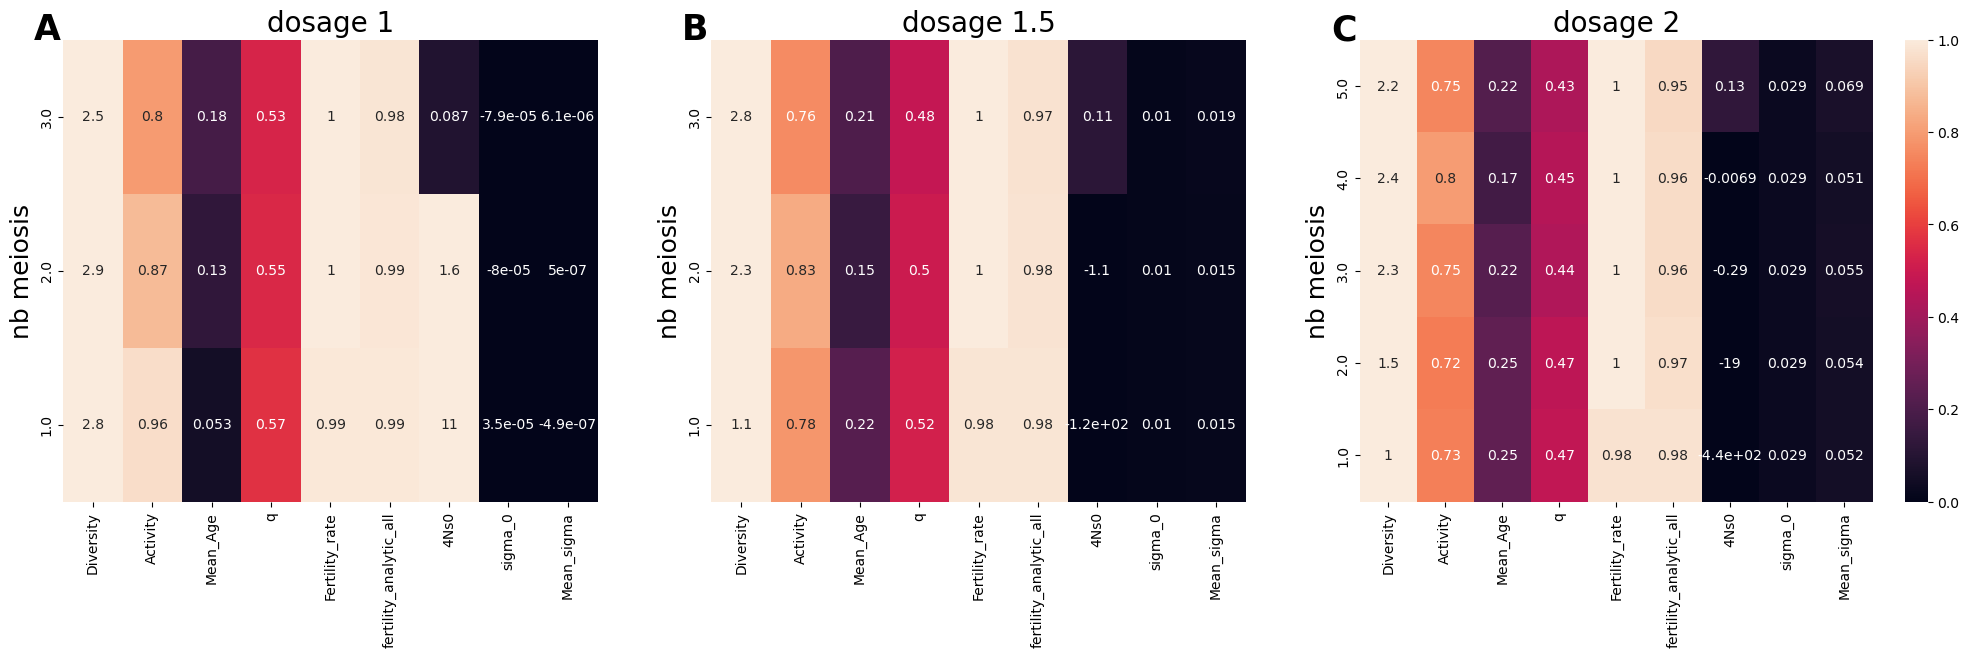

In [39]:
df_1 = pd.DataFrame(data_1,index = list_index_1)
df_1 = df_1.sort_index(axis = 0,ascending = False)
#df_1 = df_1.sort_index(axis = 1,ascending = True)

df_2 = pd.DataFrame(data_2,index = list_index_2)
df_2 = df_2.sort_index(axis = 0,ascending = False)
#df_2 = df_2.sort_index(axis = 1,ascending = True)

df_3 = pd.DataFrame(data_3,index = list_index_3)
df_3 = df_3.sort_index(axis = 0,ascending = False)

figure=plt.figure()
figure, axs = plt.subplots(ncols=3, gridspec_kw=dict(width_ratios=[5,5,6]),figsize=(25,6))
figure.patch.set_facecolor('white')
figure.patch.set_alpha(0)

sns.heatmap(df_1,annot=True,cbar=False,ax=axs[0],vmin=0,vmax=1)
sns.heatmap(df_2,annot=True,cbar=False,ax=axs[1],vmin=0,vmax=1)
sns.heatmap(df_3,annot=True,cbar=True,ax=axs[2],vmin=0,vmax=1)

axs[0].set_ylabel('nb meiosis',size=18)
axs[1].set_ylabel('nb meiosis',size=18)
axs[2].set_ylabel('nb meiosis',size=18)

axs[0].set_title("dosage 1",size=20)
axs[1].set_title("dosage 1.5",size=20)
axs[2].set_title("dosage 2",size=20)

axs[0].text(y=0,x=-0.5,s="A",fontsize=25,fontweight='bold')
axs[1].text(y=0,x=-0.5,s="B",fontsize=25,fontweight='bold')
axs[2].text(y=0,x=-0.5,s="C",fontsize=25,fontweight='bold')


plt.show()

## Table 2 : line 6

Text(0.5, 1.0, 'scaling meiosis')

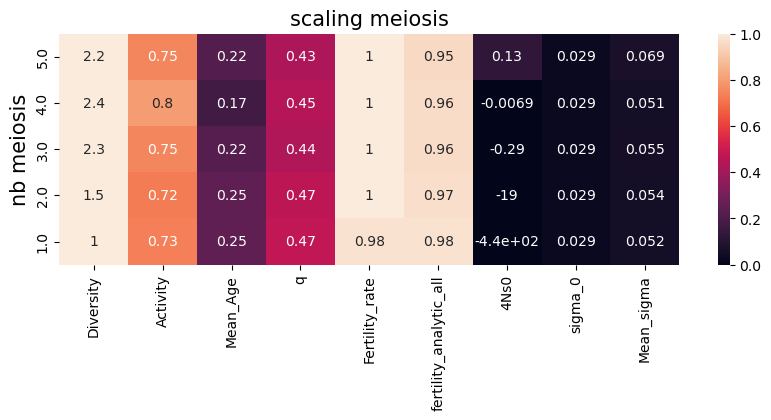

In [40]:
df_5 = pd.DataFrame(data_3, index = list_index_3)
df_5=df_5.sort_index(axis = 0,ascending = False)
plt.subplots(figsize=(10,3))
ax1 = sns.heatmap(df_5,annot=True,vmin=0,vmax=1)
ax1.set_ylabel('nb meiosis',size=15)
ax1.set_title("scaling meiosis",size=15)

## Table 2 : lines 5 and 4

In [41]:
target_folder_path_1=init_path+"analyses/scaling_empiric/empiric_table_2/"

(col_names_4,list_index_4,data_4)=Heatmap_mei_all_param(target_folder_path_1, logfert, withoutneutral, init_line,coeff_gamma,c,sig_2,y_params)

Run_U_6e-4.allele
Run_U_6e-4.err
Run_U_6e-4.out
Run_U_6e-4.params
Run_U_6e-4.sh
Run_U_6e-4.time
Run_U_6e-4.trace
Run_aff_2.allele
Run_aff_2.err
Run_aff_2.out
Run_aff_2.params
Run_aff_2.sh
Run_aff_2.time
Run_aff_2.trace
Run_U_6e-4.allele
Run_U_6e-4.err
Run_U_6e-4.out
Run_U_6e-4.params
Run_U_6e-4.sh
Run_U_6e-4.time
Run_U_6e-4.trace
Run_aff_2.allele
Run_aff_2.err
Run_aff_2.out
Run_aff_2.params
Run_aff_2.sh
Run_aff_2.time
Run_aff_2.trace
Run_U_6e-4.allele
Run_U_6e-4.err
Run_U_6e-4.out
Run_U_6e-4.params
Run_U_6e-4.sh
Run_U_6e-4.time
Run_U_6e-4.trace
Run_aff_2.allele
Run_aff_2.err
Run_aff_2.out
Run_aff_2.params
Run_aff_2.sh
Run_aff_2.time
Run_aff_2.trace
Run_U_6e-4.allele
Run_U_6e-4.err
Run_U_6e-4.out
Run_U_6e-4.params
Run_U_6e-4.sh
Run_U_6e-4.time
Run_U_6e-4.trace
Run_aff_2.allele
Run_aff_2.err
Run_aff_2.out
Run_aff_2.params
Run_aff_2.sh
Run_aff_2.time
Run_aff_2.trace
Run_U_6e-4.allele
Run_U_6e-4.err
Run_U_6e-4.out
Run_U_6e-4.params
Run_U_6e-4.sh
Run_U_6e-4.time
Run_U_6e-4.trace
Run_aff_2.a

Text(95.72222222222221, 0.5, 'u and aff')

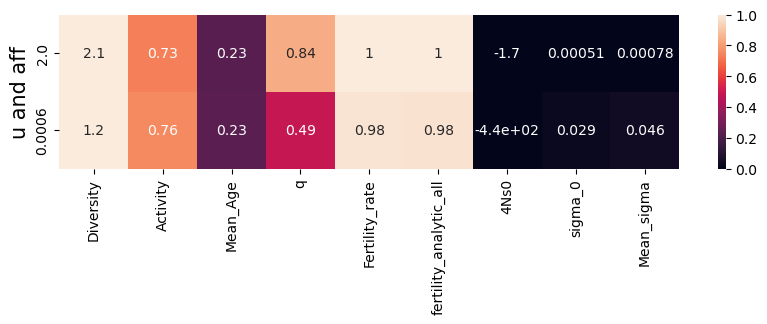

In [42]:
df_4 = pd.DataFrame(data_4, index = list_index_4)
df_4=df_4.sort_index(axis = 0,ascending = False)
plt.subplots(figsize=(10,2))
ax1 = sns.heatmap(df_4,annot=True,vmin=0,vmax=1)
ax1.set_ylabel('u and aff',size=15)
#ax1.set_title("u=6e-4 or aff=2",size=15)

## Table 2 : line 7

In [44]:
target_folder_path_1=init_path+"analyses/scaling_empiric/scaling_empiric_DSB/"

(col_names_5,list_index_5,data_5)=Heatmap_mei_all_param(target_folder_path_1, logfert, withoutneutral, init_line,coeff_gamma,c,sig_2,y_params)

Run_DSB_16.allele
Run_DSB_16.err
Run_DSB_16.out
Run_DSB_16.params
Run_DSB_16.sh
Run_DSB_16.time
Run_DSB_16.trace
Run_DSB_24.allele
Run_DSB_24.err
Run_DSB_24.out
Run_DSB_24.params
Run_DSB_24.sh
Run_DSB_24.time
Run_DSB_24.trace
Run_DSB_32.allele
Run_DSB_32.err
Run_DSB_32.out
Run_DSB_32.params
Run_DSB_32.sh
Run_DSB_32.time
Run_DSB_32.trace
Run_DSB_8.allele
Run_DSB_8.err
Run_DSB_8.out
Run_DSB_8.params
Run_DSB_8.sh
Run_DSB_8.time
Run_DSB_8.trace
Run_DSB_16.allele
Run_DSB_16.err
Run_DSB_16.out
Run_DSB_16.params
Run_DSB_16.sh
Run_DSB_16.time
Run_DSB_16.trace
Run_DSB_24.allele
Run_DSB_24.err
Run_DSB_24.out
Run_DSB_24.params
Run_DSB_24.sh
Run_DSB_24.time
Run_DSB_24.trace
Run_DSB_32.allele
Run_DSB_32.err
Run_DSB_32.out
Run_DSB_32.params
Run_DSB_32.sh
Run_DSB_32.time
Run_DSB_32.trace
Run_DSB_8.allele
Run_DSB_8.err
Run_DSB_8.out
Run_DSB_8.params
Run_DSB_8.sh
Run_DSB_8.time
Run_DSB_8.trace
Run_DSB_16.allele
Run_DSB_16.err
Run_DSB_16.out
Run_DSB_16.params
Run_DSB_16.sh
Run_DSB_16.time
Run_DSB_16.tra

Text(95.72222222222221, 0.5, 'DSB')

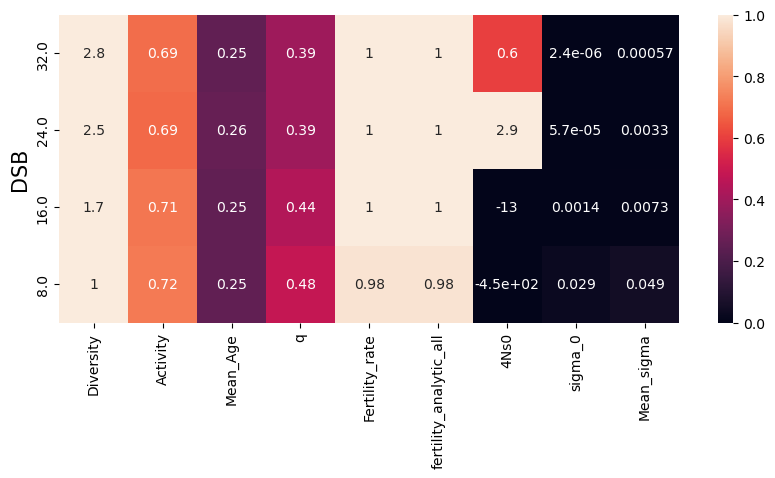

In [48]:
df_6 = pd.DataFrame(data_5, index = list_index_5)
df_6=df_6.sort_index(axis = 0,ascending = False)
plt.subplots(figsize=(10,4))
ax1 = sns.heatmap(df_6,annot=True,vmin=0,vmax=1)
ax1.set_ylabel('DSB',size=15)